In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
outfile = "run42-TRB-HUMAN-shared-clones.xlsx"
ptfile = "20210802-RUN42-DataSheet-TCRb.csv"

## Read data

In [3]:
df_pt = pd.read_csv(ptfile, sep=",", skiprows=20)
df_pt = df_pt.rename(columns={'Sample': 'SampleInfo'})
df_pt["Sample"] = df_pt["Sample_Name"] + "_" + df_pt["Nr"]
df_pt.head()

,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,index2,Run,Nr,...,Species,Chain,Patient,SampleInfo,UMI,HEK cells,RACE,Constant,Isotype,Sample
0,N701_S502,DO-057V1-Tfh4-Tu,NaN,NaN,NaN,NaN,NaN,NaN,run42,S1,...,human,TCRb,DO-057V1,CD4+ Tfh,yes,no,no,no,TCRb,DO-057V1-Tfh4-Tu_S1
1,N702_S502,DO-057V1-Tph4-Tu,NaN,NaN,NaN,NaN,NaN,NaN,run42,S2,...,human,TCRb,DO-057V1,CD4+ Tph,yes,no,no,no,TCRb,DO-057V1-Tph4-Tu_S2
2,N703_S502,DO-057V1-Tfh8-Tu,NaN,NaN,NaN,NaN,NaN,NaN,run42,S3,...,human,TCRb,DO-057V1,CD8+ Tfh,yes,no,no,no,TCRb,DO-057V1-Tfh8-Tu_S3
3,N704_S502,DO-057V1-LN-Tu,NaN,NaN,NaN,NaN,NaN,NaN,run42,S4,...,human,TCRb,DO-057V1,LN biopsy,yes,no,no,no,TCRb,DO-057V1-LN-Tu_S4
4,N705_S502,DO-056V1-Tfh4-Tu,NaN,NaN,NaN,NaN,NaN,NaN,run42,S5,...,human,TCRb,DO-056V1,CD4+ Tfh,yes,no,no,no,TCRb,DO-056V1-Tfh4-Tu_S5


In [4]:
myfiles = [x for x in os.listdir(".") if x.startswith("cdr3-clones") and "TRB" in x]
myfiles

['cdr3-clones-DC4Balance-TRB_HUMAN-after-reassignment.csv',
 'cdr3-clones-DOMINO-TRB_HUMAN-after-reassignment.csv']

In [5]:
cols = ['Sample', 'cdr3pep', 'freq']
df = pd.read_csv(myfiles[0], sep="\t")
df = df[cols]
df.head()

,Sample,cdr3pep,freq
0,BP-T081-Tu_S33,CSVEDGYGYTFG,212
1,BP-T081-Tu_S33,CSVKGARTEAFFG,168
2,BP-T081-Tu_S33,CSVADQLSYGYTFG,163
3,BP-T081-Tu_S33,CSVRTSGRTDTQYFG,160
4,BP-T081-Tu_S33,CASRGQGSNQPQHFG,136


In [6]:
for myfile in myfiles[1:]:
    df_tmp = pd.read_csv(myfile, sep="\t")
    df_tmp = df_tmp[cols]
    df = df.append(df_tmp)
df.tail()

,Sample,cdr3pep,freq
103288,DO-057V1-Tph4-Tu_S2,CVSSPTSGGASYNEQFFG,1
103289,DO-057V1-Tph4-Tu_S2,CVSSQTGQDYGYTFG,1
103290,DO-057V1-Tph4-Tu_S2,CVSSYSPGNTDTQYFG,1
103291,DO-057V1-Tph4-Tu_S2,CVTRTASGNTIYFG,1
103292,DO-057V1-Tph4-Tu_S2,CVTSDPSKGEKLFFG,1


In [7]:
# Merge pt-table with clones
df = pd.merge(df, df_pt, on="Sample")
df.head()

,Sample,cdr3pep,freq,Sample_ID,Sample_Name,Sample_Plate,Sample_Well,I7_Index_ID,index,I5_Index_ID,...,Sample_Project,Species,Chain,Patient,SampleInfo,UMI,HEK cells,RACE,Constant,Isotype
0,BP-T081-Tu_S33,CSVEDGYGYTFG,212,N701_S505,BP-T081-Tu,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,VPD450+,yes,no,no,no,TCRb
1,BP-T081-Tu_S33,CSVKGARTEAFFG,168,N701_S505,BP-T081-Tu,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,VPD450+,yes,no,no,no,TCRb
2,BP-T081-Tu_S33,CSVADQLSYGYTFG,163,N701_S505,BP-T081-Tu,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,VPD450+,yes,no,no,no,TCRb
3,BP-T081-Tu_S33,CSVRTSGRTDTQYFG,160,N701_S505,BP-T081-Tu,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,VPD450+,yes,no,no,no,TCRb
4,BP-T081-Tu_S33,CASRGQGSNQPQHFG,136,N701_S505,BP-T081-Tu,NaN,NaN,NaN,NaN,NaN,...,DC4Balance,human,TCRb,P53V01,VPD450+,yes,no,no,no,TCRb


In [8]:
df = df.groupby(["Patient", "Sample", "cdr3pep"]).agg({'freq': sum})
df = df.reset_index()
df.head()

,Patient,Sample,cdr3pep,freq
0,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSFRVTGANVLTFG,1
1,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLFATSSGEQYFG,1
2,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLGGSMNTEAFFG,1
3,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGKGGPNYGYTFG,1
4,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGSATRLVVEAFFG,1


In [9]:
df_total = df.groupby("Sample").agg({"freq": sum})
df_total = df_total.reset_index()
df_total = df_total.rename(columns={'freq': 'totalreads'})
df_total.head()

,Sample,totalreads
0,BP-T081-Tu_S33,8103
1,BP-T082-Tu_S34,5710
2,BP-T083-Tu_S35,14859
3,BP-T084-Tu_S36,15361
4,BP-T090-Tu_S37,20812


In [10]:
df = pd.merge(df, df_total, on="Sample")
df.head()

,Patient,Sample,cdr3pep,freq,totalreads
0,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSFRVTGANVLTFG,1,11253
1,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLFATSSGEQYFG,1,11253
2,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLGGSMNTEAFFG,1,11253
3,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGKGGPNYGYTFG,1,11253
4,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGSATRLVVEAFFG,1,11253


In [11]:
df.tail()

,Patient,Sample,cdr3pep,freq,totalreads
195335,P53V07,BP-T096-Tu_S39,CSVQITEAFFG,12,2718
195336,P53V07,BP-T096-Tu_S39,CSVQPRRGANVLTFG,21,2718
195337,P53V07,BP-T096-Tu_S39,CSVTLNTEAFFG,28,2718
195338,P53V07,BP-T096-Tu_S39,CSVVRVSTDTQYFG,1,2718
195339,P53V07,BP-T096-Tu_S39,CTSSPWDEADTQYFG,1,2718


In [12]:
df['perc'] = 100 * df['freq'] / df['totalreads']
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSFRVTGANVLTFG,1,11253,0.008887
1,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLFATSSGEQYFG,1,11253,0.008887
2,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLGGSMNTEAFFG,1,11253,0.008887
3,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGKGGPNYGYTFG,1,11253,0.008887
4,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGSATRLVVEAFFG,1,11253,0.008887


## Determine overlap (shared clones) and the direction

In [13]:
ids = list(df['Sample'].unique())
ids[:10]

['DO-051V1-Tfh4-Tu_S24',
 'DO-051V1-Tph4-Tu_S23',
 'DO-053V1-Tfh4-Tu_S21',
 'DO-053V1-Tfh8-Tu_S22',
 'DO-053V1-Tph4-Tu_S20',
 'DO-054V1-Tfh4-Tu_S18',
 'DO-054V1-Tfh8-Tu_S17',
 'DO-054V1-Tph4-Tu_S19',
 'DO-056V1-LN-Tu_S8',
 'DO-056V1-Tfh4-Tu_S5']

In [14]:
def directionShared(df, idA, idB):
    df_A = df[df['Sample'] == idA]
    df_B = df[df['Sample'] == idB]
    df_pair = pd.merge(df_A, df_B, on="cdr3pep")
    sum_A = df_pair["perc_x"].sum()
    sum_B = df_pair["perc_y"].sum()
    if sum_B > sum_A:
        idA, idB = idB, idA
        sum_A, sum_B = sum_B, sum_A
    return(idA, idB, sum_A, sum_B)
directionShared(df, "DO-004V3-P5_S123", "DO-004V3-P8_S127")

('DO-004V3-P5_S123', 'DO-004V3-P8_S127', 0.0, 0.0)

In [15]:
sources = list()
targets = list()
impacts_source = list()
impacts_target = list()
for i in range(len(ids)-1):
    for j in range(i+1, len(ids)):
        idA = ids[i]
        idB = ids[j]
        (source, target, impact_source, impact_target) = directionShared(df, idA, idB)
        sources.append(source)
        targets.append(target)
        impacts_source.append(impact_source)
        impacts_target.append(impact_target)
df_shared = pd.DataFrame({'source': sources, 'target': targets, 'impact_source': impacts_source, 'impact_target': impacts_target})
df_shared.head()

,source,target,impact_source,impact_target
0,DO-051V1-Tph4-Tu_S23,DO-051V1-Tfh4-Tu_S24,7.346916,6.416067
1,DO-051V1-Tfh4-Tu_S24,DO-053V1-Tfh4-Tu_S21,0.657602,0.310198
2,DO-051V1-Tfh4-Tu_S24,DO-053V1-Tfh8-Tu_S22,0.044433,0.013194
3,DO-051V1-Tfh4-Tu_S24,DO-053V1-Tph4-Tu_S20,0.710922,0.229744
4,DO-051V1-Tfh4-Tu_S24,DO-054V1-Tfh4-Tu_S18,0.186617,0.012342


In [16]:
# Add patient columns for the source and the target
cols = ["Patient", "Sample"]
df_sample_patient = df_pt[cols]
df_shared = pd.merge(df_shared, df_sample_patient, left_on="source", right_on="Sample").rename(columns={"Patient": "patient_source", "Sample": "sample_source"})
df_shared = pd.merge(df_shared, df_sample_patient, left_on="target", right_on="Sample").rename(columns={"Patient": "patient_target", "Sample": "sample_target"})
cols = ["source", "target", "impact_source", "impact_target", "patient_source", "patient_target"]
df_shared = df_shared[cols]
df_shared.head()

,source,target,impact_source,impact_target,patient_source,patient_target
0,DO-051V1-Tph4-Tu_S23,DO-051V1-Tfh4-Tu_S24,7.346916,6.416067,DO-051V1,DO-051V1
1,DO-054V1-Tph4-Tu_S19,DO-051V1-Tfh4-Tu_S24,0.129944,0.044433,DO-054V1,DO-051V1
2,DO-056V1-Tfh8-Tu_S7,DO-051V1-Tfh4-Tu_S24,0.295175,0.115525,DO-056V1,DO-051V1
3,DO-057V1-Tfh8-Tu_S3,DO-051V1-Tfh4-Tu_S24,0.352836,0.346574,DO-057V1,DO-051V1
4,BP-T117-Tu_S53,DO-051V1-Tfh4-Tu_S24,0.271739,0.008887,P20V01,DO-051V1


In [17]:
# sort on impact on the target and then on impact of the source
df_shared = df_shared.sort_values(by=["impact_target", "impact_source"], ascending=False)
df_shared = df_shared.reset_index()
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target
0,1766,BP-T226-Tu_S104,BP-T220-Tu_S101,80.105492,75.554687,P21V010,P21V07
1,740,BP-T220-Tu_S101,BP-T214-Tu_S88,61.704047,61.011905,P21V07,P21V01
2,739,BP-T226-Tu_S104,BP-T214-Tu_S88,62.985896,56.994048,P21V010,P21V01
3,1512,BP-T135-Tu_S86,BP-T123-Tu_S67,37.741884,36.966496,P20V010,P20V01
4,1323,BP-T241-Tu_S105,BP-T247-Tu_S107,37.242064,30.823209,P23V01,P23V07


In [18]:
same_pt = list()
for i in range(len(df_shared)):
    if df_shared['patient_source'][i] == df_shared['patient_target'][i]:
        same_pt.append("same")
    else:
        same_pt.append("different")
df_shared["Same patient"] = same_pt
df_shared.head()

,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,1766,BP-T226-Tu_S104,BP-T220-Tu_S101,80.105492,75.554687,P21V010,P21V07,different
1,740,BP-T220-Tu_S101,BP-T214-Tu_S88,61.704047,61.011905,P21V07,P21V01,different
2,739,BP-T226-Tu_S104,BP-T214-Tu_S88,62.985896,56.994048,P21V010,P21V01,different
3,1512,BP-T135-Tu_S86,BP-T123-Tu_S67,37.741884,36.966496,P20V010,P20V01,different
4,1323,BP-T241-Tu_S105,BP-T247-Tu_S107,37.242064,30.823209,P23V01,P23V07,different


In [19]:
df_shared.to_excel(outfile)
print("Wrote", outfile, "to disk")

Wrote run42-TRB-HUMAN-shared-clones.xlsx to disk


## Visualize it

In [20]:
df_shared = df_shared[(df_shared["impact_source"] != 0) & (df_shared["impact_target"] != 0)]
df_shared = df_shared.reset_index()
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient
0,0,1766,BP-T226-Tu_S104,BP-T220-Tu_S101,80.105492,75.554687,P21V010,P21V07,different
1,1,740,BP-T220-Tu_S101,BP-T214-Tu_S88,61.704047,61.011905,P21V07,P21V01,different
2,2,739,BP-T226-Tu_S104,BP-T214-Tu_S88,62.985896,56.994048,P21V010,P21V01,different
3,3,1512,BP-T135-Tu_S86,BP-T123-Tu_S67,37.741884,36.966496,P20V010,P20V01,different
4,4,1323,BP-T241-Tu_S105,BP-T247-Tu_S107,37.242064,30.823209,P23V01,P23V07,different


In [21]:
def makeScatter(x,y,txt,color,xlabel,ylabel,plotfile):
    fig, ax = plt.subplots(figsize=(15,15))
    ax.scatter(x, y, color=color)

    for i, txt in enumerate(txt):
        ax.annotate(txt, (x[i], y[i]))
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Add red dotted line
    ax.plot([-1, 100], [-1, 100], c='w', linestyle=":")
    
    # Save figure to file
    fig.savefig(plotfile)
    print("Wrote", plotfile, "to disk")

In [22]:
f = lambda x,y: x + "->" + y
df_shared['txt'] = [x for x in map(f, df_shared['source'], df_shared['target'])]
df_shared['color'] = "blue"
df_shared.loc[df_shared["Same patient"] == "same", 'color'] = "purple"
df_shared.head()

,level_0,index,source,target,impact_source,impact_target,patient_source,patient_target,Same patient,txt,color
0,0,1766,BP-T226-Tu_S104,BP-T220-Tu_S101,80.105492,75.554687,P21V010,P21V07,different,BP-T226-Tu_S104->BP-T220-Tu_S101,blue
1,1,740,BP-T220-Tu_S101,BP-T214-Tu_S88,61.704047,61.011905,P21V07,P21V01,different,BP-T220-Tu_S101->BP-T214-Tu_S88,blue
2,2,739,BP-T226-Tu_S104,BP-T214-Tu_S88,62.985896,56.994048,P21V010,P21V01,different,BP-T226-Tu_S104->BP-T214-Tu_S88,blue
3,3,1512,BP-T135-Tu_S86,BP-T123-Tu_S67,37.741884,36.966496,P20V010,P20V01,different,BP-T135-Tu_S86->BP-T123-Tu_S67,blue
4,4,1323,BP-T241-Tu_S105,BP-T247-Tu_S107,37.242064,30.823209,P23V01,P23V07,different,BP-T241-Tu_S105->BP-T247-Tu_S107,blue


Wrote run42-TRB-HUMAN-shared-clones-all.pdf to disk


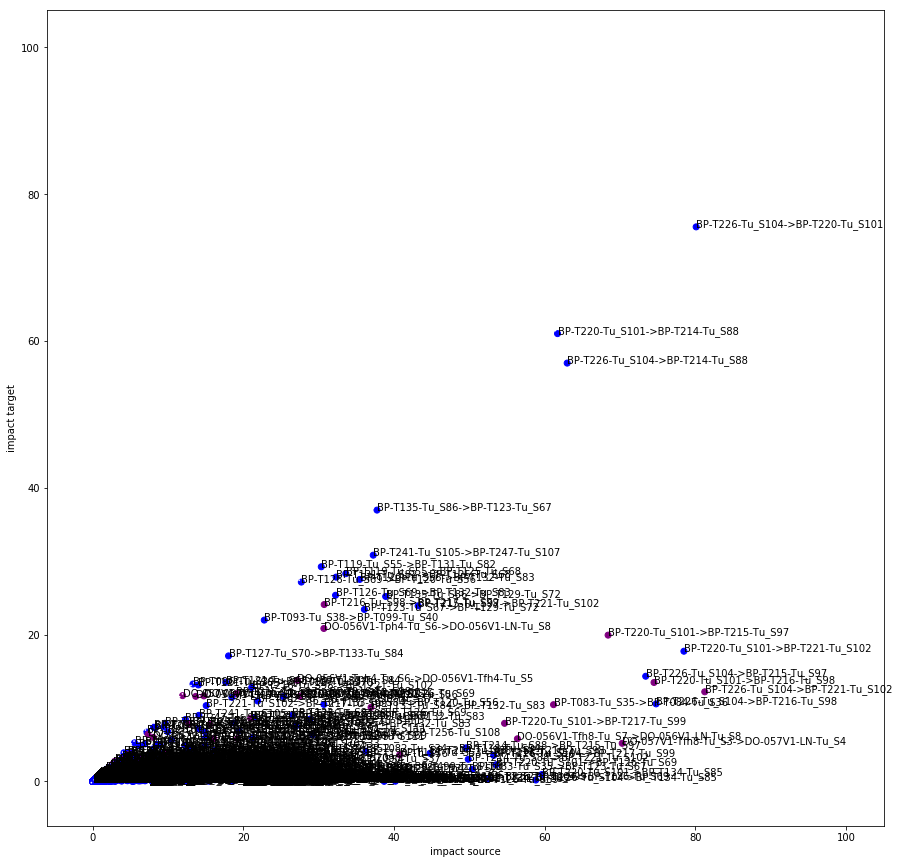

In [23]:
plotfile = outfile.replace(".xlsx", "-all.pdf")
makeScatter(df_shared["impact_source"], df_shared["impact_target"], df_shared['txt'], df_shared['color'], "impact source", "impact target", plotfile)

In [24]:
# Only show things that are different
df_shared_filter = df_shared.copy()
df_shared_filter = df_shared_filter[df_shared_filter["Same patient"] == "different"]
cols = ["source", "target", "impact_source", "impact_target", "Same patient", "txt", "color"]
df_shared_filter = df_shared_filter[cols]
df_shared_filter = df_shared_filter.reset_index()
df_shared_filter.head()

,index,source,target,impact_source,impact_target,Same patient,txt,color
0,0,BP-T226-Tu_S104,BP-T220-Tu_S101,80.105492,75.554687,different,BP-T226-Tu_S104->BP-T220-Tu_S101,blue
1,1,BP-T220-Tu_S101,BP-T214-Tu_S88,61.704047,61.011905,different,BP-T220-Tu_S101->BP-T214-Tu_S88,blue
2,2,BP-T226-Tu_S104,BP-T214-Tu_S88,62.985896,56.994048,different,BP-T226-Tu_S104->BP-T214-Tu_S88,blue
3,3,BP-T135-Tu_S86,BP-T123-Tu_S67,37.741884,36.966496,different,BP-T135-Tu_S86->BP-T123-Tu_S67,blue
4,4,BP-T241-Tu_S105,BP-T247-Tu_S107,37.242064,30.823209,different,BP-T241-Tu_S105->BP-T247-Tu_S107,blue


Wrote run42-TRB-HUMAN-shared-clones-different-ids.pdf to disk


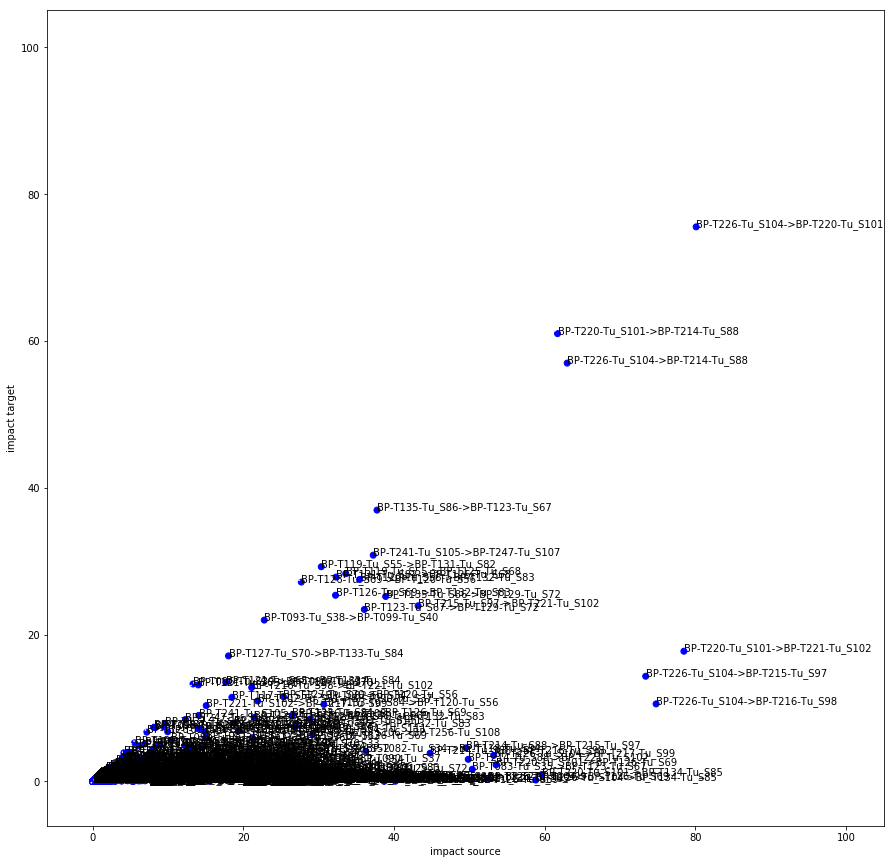

In [25]:
plotfile = outfile.replace(".xlsx", "-different-ids.pdf")
makeScatter(df_shared_filter["impact_source"], df_shared_filter["impact_target"], df_shared_filter['txt'], df_shared_filter['color'], "impact source", "impact target", plotfile)

## Calculate common/public clones

In [26]:
df.head()

,Patient,Sample,cdr3pep,freq,totalreads,perc
0,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSFRVTGANVLTFG,1,11253,0.008887
1,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLFATSSGEQYFG,1,11253,0.008887
2,DO-051V1,DO-051V1-Tfh4-Tu_S24,CACSLGGSMNTEAFFG,1,11253,0.008887
3,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGKGGPNYGYTFG,1,11253,0.008887
4,DO-051V1,DO-051V1-Tfh4-Tu_S24,CAGSATRLVVEAFFG,1,11253,0.008887


In [27]:
concat = lambda x: ", ".join(list(set(x)))
df_clone_occurrence = df.groupby('cdr3pep').agg({'Patient': [pd.Series.nunique, concat], 'Sample': [pd.Series.nunique, concat]})

In [28]:
df_clone_occurrence = df_clone_occurrence.rename(columns={'<lambda>': 'names'})
df_clone_occurrence.head()

Patient            Sample                     
                nunique     names nunique                names
cdr3pep                                                       
CAAAANTGELFFG         1    P53V01       1       BP-T084-Tu_S36
CAAAASGNTGELFFG       1  DO-056V1       1  DO-056V1-Tfh4-Tu_S5
CAAAASNQPQHFG         1  DO-056V1       1  DO-056V1-Tfh4-Tu_S5
CAAAEQHYEQYFG         1  DO-056V1       1  DO-056V1-Tfh4-Tu_S5
CAAAGGWADTQYFG        1   P53V010       1       BP-T100-Tu_S49

In [29]:
# Get percentage columns for each sample
df_pivot = df.pivot_table(index='cdr3pep', columns=['Patient','Sample'], values='perc', aggfunc='sum')
df_pivot = df_pivot.reset_index()
df_pivot.head()

Patient          cdr3pep             DO-051V1                       \
Sample                   DO-051V1-Tfh4-Tu_S24 DO-051V1-Tph4-Tu_S23   
0          CAAAANTGELFFG                  NaN                  NaN   
1        CAAAASGNTGELFFG                  NaN                  NaN   
2          CAAAASNQPQHFG                  NaN                  NaN   
3          CAAAEQHYEQYFG                  NaN                  NaN   
4         CAAAGGWADTQYFG                  NaN                  NaN   

Patient             DO-053V1                                            \
Sample  DO-053V1-Tfh4-Tu_S21 DO-053V1-Tfh8-Tu_S22 DO-053V1-Tph4-Tu_S20   
0                        NaN                  NaN                  NaN   
1                        NaN                  NaN                  NaN   
2                        NaN                  NaN                  NaN   
3                        NaN                  NaN                  NaN   
4                        NaN                  NaN                  NaN   

Patient             DO-054V1                                            \
Sample  DO-054V1-Tfh4-Tu_S18 DO-054V1-Tfh8-Tu_S17 DO-054V1-Tph4-Tu_S19   
0                        NaN                  NaN                  NaN   
1                        NaN                  NaN                  NaN   
2                        NaN                  NaN                  NaN   
3                        NaN                  NaN                  NaN   
4                        NaN                  NaN                  NaN   

Patient          DO-056V1      ...               P53V01                 \
Sample  DO-056V1-LN-Tu_S8      ...       BP-T082-Tu_S34 BP-T083-Tu_S35   
0                     NaN      ...                  NaN            NaN   
1                     NaN      ...                  NaN            NaN   
2                     NaN      ...                  NaN            NaN   
3                     NaN      ...                  NaN            NaN   
4                     NaN      ...                  NaN            NaN   

Patient                                      P53V010                 \
Sample  BP-T084-Tu_S36 BP-T090-Tu_S37 BP-T099-Tu_S40 BP-T100-Tu_S49   
0              0.00651            NaN            NaN            NaN   
1                  NaN            NaN            NaN            NaN   
2                  NaN            NaN            NaN            NaN   
3                  NaN            NaN            NaN            NaN   
4                  NaN            NaN            NaN       0.009106   

Patient                                       P53V07                 
Sample  BP-T101-Tu_S50 BP-T102-Tu_S51 BP-T093-Tu_S38 BP-T096-Tu_S39  
0                  NaN            NaN            NaN            NaN  
1                  NaN            NaN            NaN            NaN  
2                  NaN            NaN            NaN            NaN  
3                  NaN            NaN            NaN            NaN  
4                  NaN            NaN            NaN            NaN  

[5 rows x 64 columns]

In [30]:
df_clone_occurrence = pd.merge(df_clone_occurrence, df_pivot, on='cdr3pep')
df_clone_occurrence = df_clone_occurrence.sort_values(by=[('Patient','nunique'), ('Sample','nunique')], ascending=False)
df_clone_occurrence = df_clone_occurrence.reset_index()
df_clone_occurrence.head()

/data/home/bioinfo/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


index            cdr3pep Patient  \
                             nunique   
0   36651             CASSFG      16   
1   64573       CASSLNTEAFFG      10   
2   56167            CASSLFG       9   
3  127402  CASSYYAKGGKNIQYFG       9   
4   65475       CASSLQETQYFG       9   

                                                      Sample  \
                                               names nunique   
0  P20V07, P23V07, P21V010, DO-056V1, P23V010, P5...      50   
1  P20V07, DO-056V1, P23V010, P53V010, P53V01, DO...      11   
2  P20V07, DO-056V1, P21V07, P23V01, DO-054V1, DO...      15   
3  P20V07, P21V010, DO-056V1, P21V01, P21V07, P53...      13   
4  P21V010, DO-056V1, P23V010, P53V010, P21V07, P...      11   

                                                                 DO-051V1  \
                                               names DO-051V1-Tfh4-Tu_S24   
0  DO-054V1-Tph4-Tu_S19, BP-T115-Tu_S52, BP-T131-...             0.044433   
1  BP-T125-Tu_S68, BP-T090-Tu_S37, BP-T101-Tu_S50...                  NaN   
2  DO-057V1-Tfh4-Tu_S1, BP-T216-Tu_S98, BP-T131-T...                  NaN   
3  BP-T090-Tu_S37, BP-T226-Tu_S104, BP-T134-Tu_S8...             0.008887   
4  DO-056V1-LN-Tu_S8, DO-057V1-Tph4-Tu_S2, DO-053...                  NaN   

                                   DO-053V1                       \
  DO-051V1-Tph4-Tu_S23 DO-053V1-Tfh4-Tu_S21 DO-053V1-Tfh8-Tu_S22   
0             0.095414             0.209383             0.013194   
1                  NaN             0.003877                  NaN   
2                  NaN                  NaN                  NaN   
3                  NaN                  NaN                  NaN   
4                  NaN             0.003877                  NaN   

       ...               P53V01                                               \
       ...       BP-T082-Tu_S34 BP-T083-Tu_S35 BP-T084-Tu_S36 BP-T090-Tu_S37   
0      ...             0.017513            NaN        0.12369       0.019220   
1      ...                  NaN            NaN            NaN       0.124928   
2      ...                  NaN            NaN            NaN            NaN   
3      ...                  NaN            NaN            NaN       0.009610   
4      ...                  NaN            NaN            NaN            NaN   

         P53V010                                                      P53V07  \
  BP-T099-Tu_S40 BP-T100-Tu_S49 BP-T101-Tu_S50 BP-T102-Tu_S51 BP-T093-Tu_S38   
0        0.02398       0.012142       0.289140            NaN       0.234144   
1            NaN            NaN       0.052891            NaN            NaN   
2            NaN            NaN            NaN            NaN       0.131223   
3            NaN            NaN            NaN            NaN            NaN   
4            NaN            NaN       0.014104            NaN            NaN   

                  
  BP-T096-Tu_S39  
0       2.281089  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 69 columns]

In [31]:
# Only keep entries that are in 2 or more Samples
print("All cdr3's:", len(df_clone_occurrence))
df_clone_occurrence = df_clone_occurrence[df_clone_occurrence[('Sample','nunique')] > 1]
print("cdr3's in > 1 sample:", len(df_clone_occurrence))

All cdr3's: 174704
cdr3's in > 1 sample: 15021


In [32]:
occurrence_file = outfile.replace(".xlsx", "-occurrence.xlsx")
df_clone_occurrence.to_excel(occurrence_file)
print("Wrote", occurrence_file, "to disk")

Wrote run42-TRB-HUMAN-shared-clones-occurrence.xlsx to disk
